In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
#from dataprep.eda import create_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(['Unnamed: 32', 'id'],axis = 1 ,inplace = True)

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# create_report(data)

In [8]:
data.isnull().sum().sum()

0

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

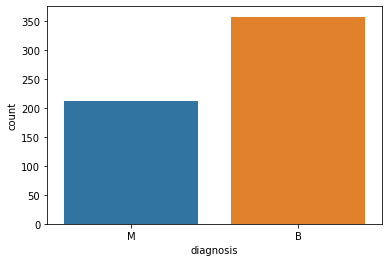

In [9]:
sns.countplot(data['diagnosis'])

In [10]:
data["diagnosis"] = [1 if i.strip() == "M" else 0 for i in data.diagnosis]

<AxesSubplot:>

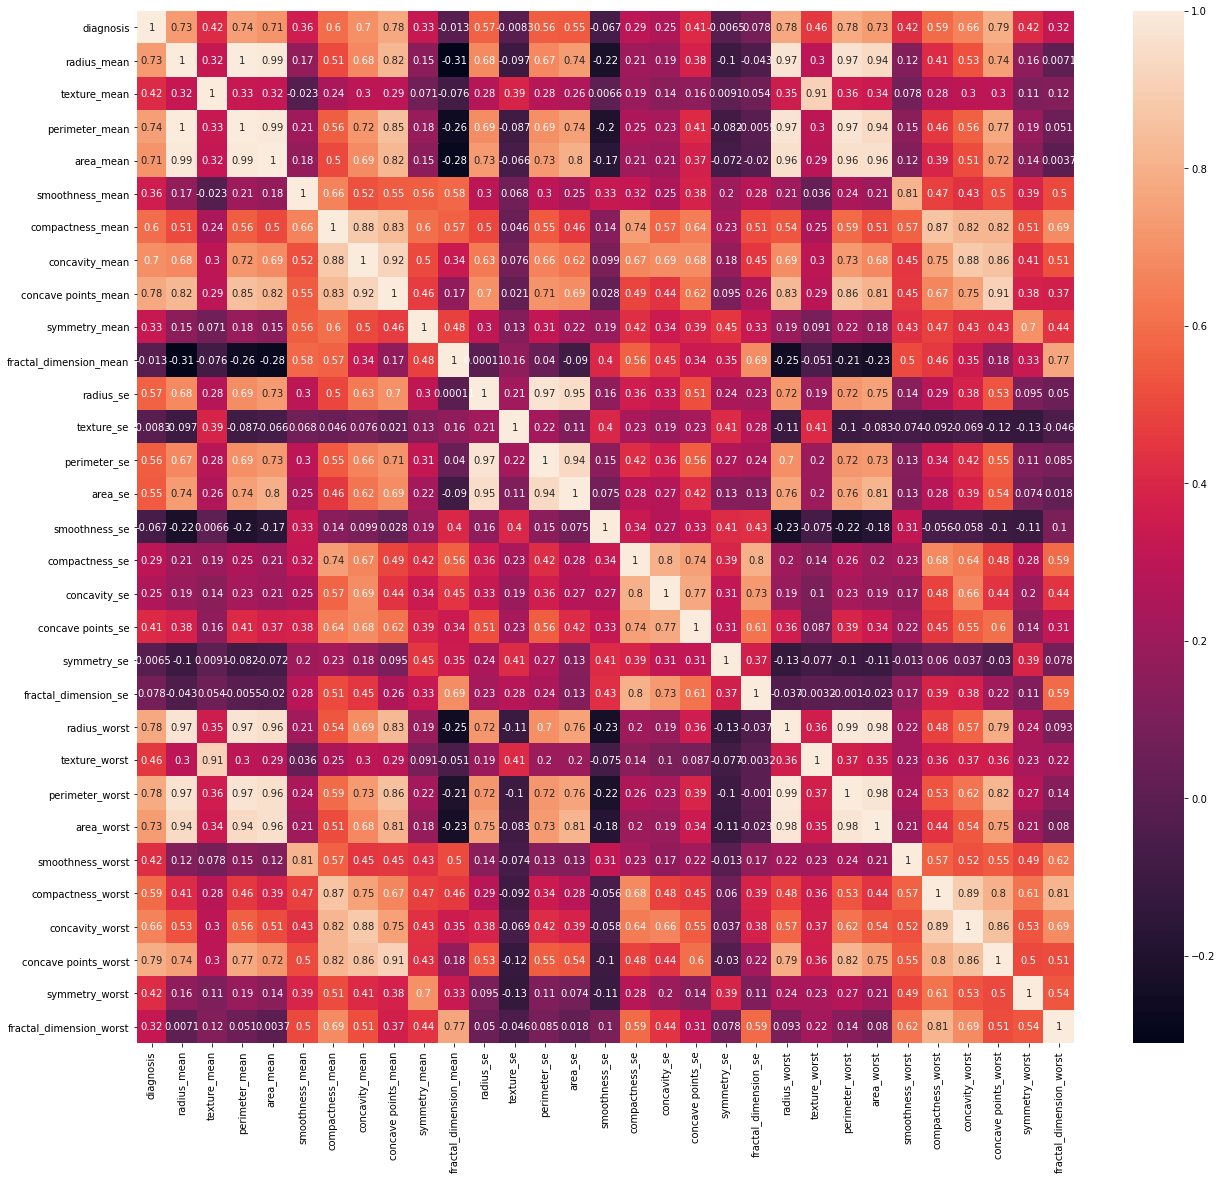

In [11]:
f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(data.corr(),annot=True)

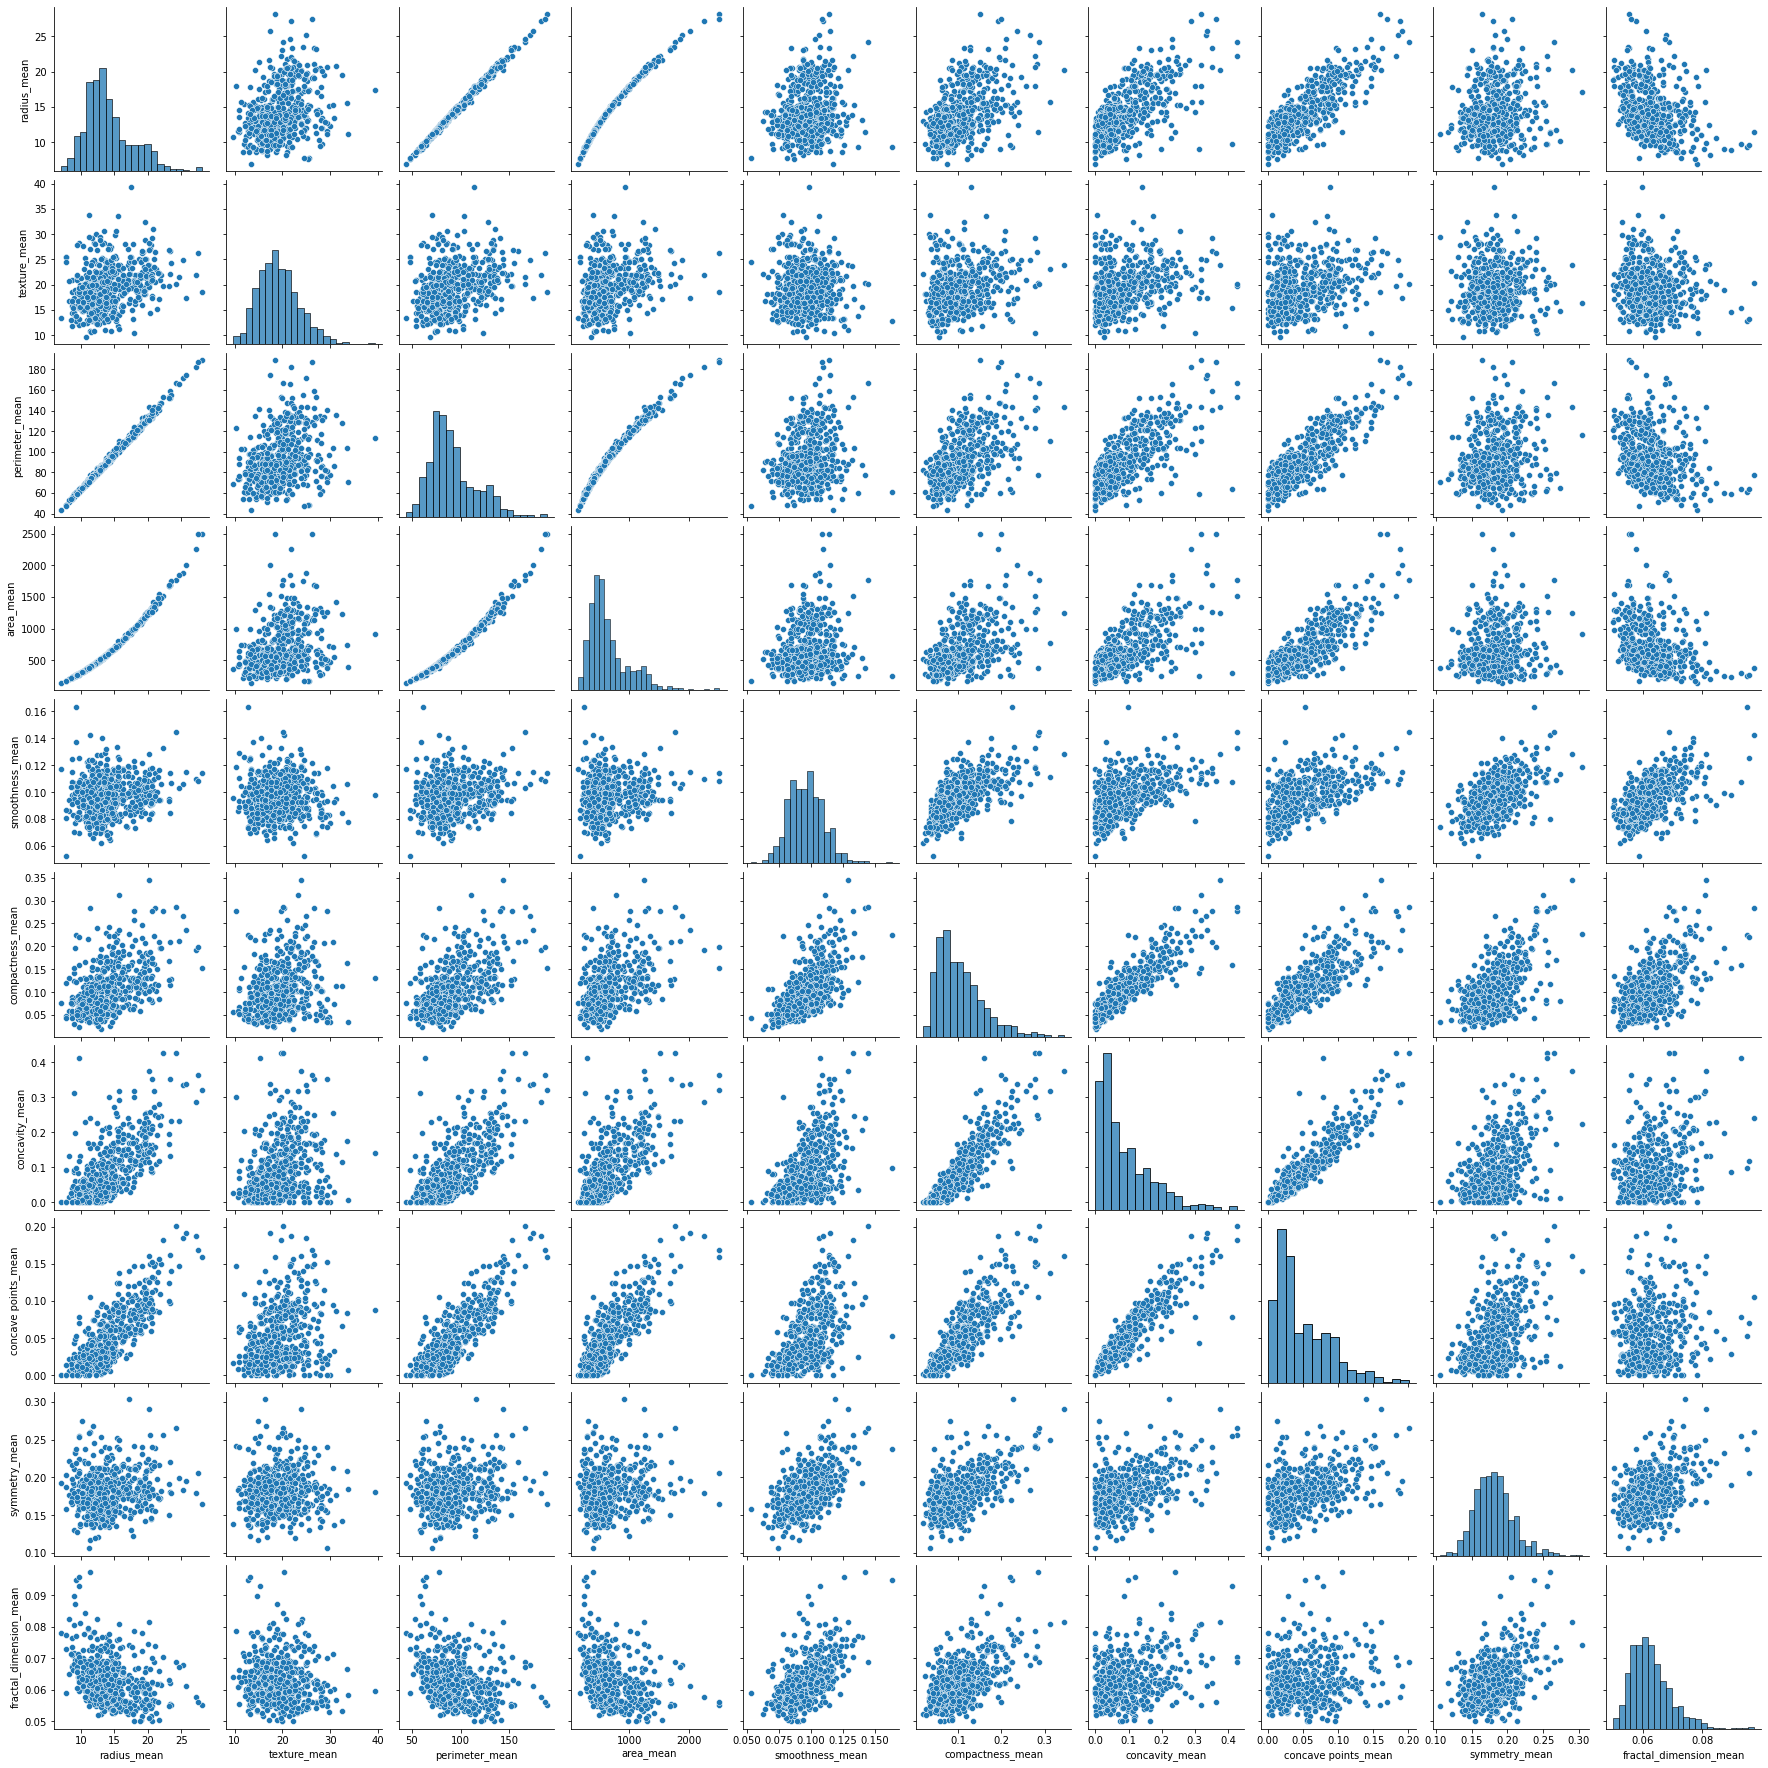

In [13]:
#Exploring the primary features.
sns.pairplot(data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']])

<AxesSubplot:title={'center':'Correlation with target'}>

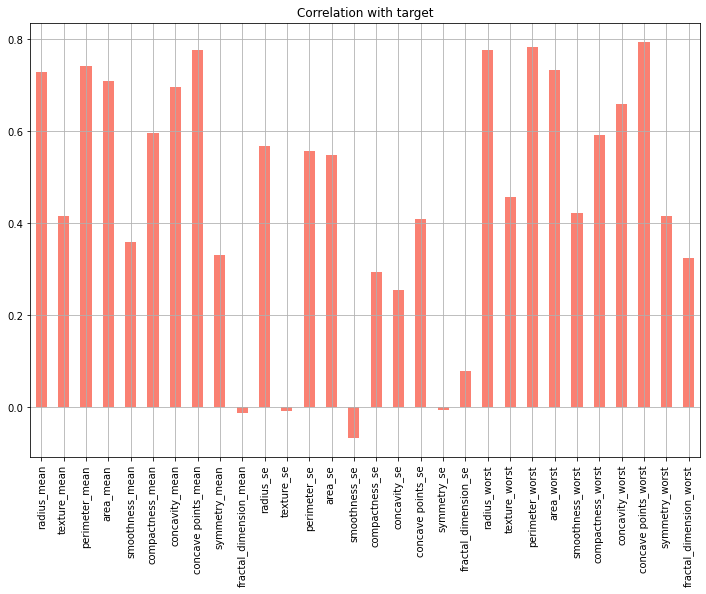

In [12]:
#Correlation with Target Variable
data.drop('diagnosis', axis=1).corrwith(data['diagnosis']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target",color="salmon")


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored k features
select_feature = SelectKBest(chi2, k=10).fit(data.drop('diagnosis',axis = 1 ), data['diagnosis'])

print('Score list:', select_feature.scores_)
print('Feature list:', data.columns)
select_feature

Score list: [2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 1.49899264e-01 5.40307549e+00 1.97123536e+01 1.05440354e+01
 2.57379775e-01 7.43065536e-05 3.46752472e+01 9.79353970e-03
 2.50571896e+02 8.75850471e+03 3.26620664e-03 6.13785332e-01
 1.04471761e+00 3.05231563e-01 8.03633831e-05 6.37136566e-03
 4.91689157e+02 1.74449400e+02 3.66503542e+03 1.12598432e+05
 3.97365694e-01 1.93149220e+01 3.95169151e+01 1.34854195e+01
 1.29886140e+00 2.31522407e-01]
Feature list: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactne

SelectKBest(score_func=<function chi2 at 0x7fc244d651f0>)

In [15]:
select_feature.transform(data.drop('diagnosis',axis = 1))
selected_columns = np.array(data.drop('diagnosis',axis = 1).columns)[select_feature.get_support()]
selected_columns

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'], dtype=object)

In [16]:
Selected_df = pd.DataFrame(select_feature.transform(data.drop('diagnosis',axis = 1)),columns=selected_columns)
y = data.diagnosis

In [17]:
Selected_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.91,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.54,16.67,152.20,1575.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(Selected_df, y, test_size=0.2, random_state=0)

Classsification Report:              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



<AxesSubplot:>

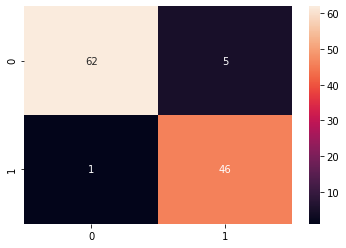

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)

print(f"Classsification Report:{classification_report(y_test,y_pred_lr)}")


confmat = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report:              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



<AxesSubplot:>

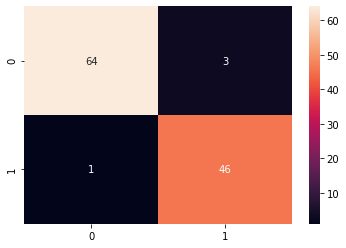

In [20]:
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
y_pred_rf=rfc.predict(X_test)

print(f"Classsification Report:{classification_report(y_test,y_pred_rf)}")


confmat = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report:              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



<AxesSubplot:>

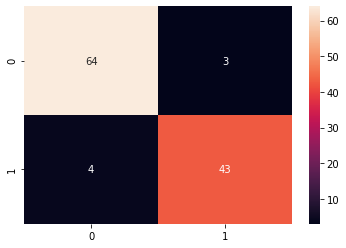

In [21]:
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
y_pred_dt=tree.predict(X_test)

print(f"Classsification Report:{classification_report(y_test,y_pred_dt)}")


confmat = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(confmat,annot=True,fmt="d")

Classsification Report:              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



<AxesSubplot:>

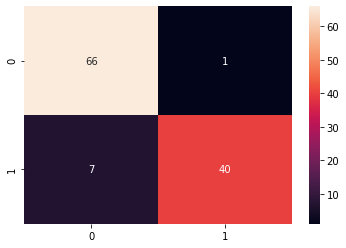

In [22]:
knn= KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)

print(f"Classsification Report:{classification_report(y_test,y_pred_knn)}")


confmat = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(confmat,annot=True,fmt="d")
